# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [21]:
import numpy
from matplotlib import pyplot as plt

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [22]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f') #empty matrix of postions
        # YOUR CODE HERE
        for i in range (0, n+1):
            positions[i] = self.pos
            self.pos = positions[i] + self.pickStep()
        return positions

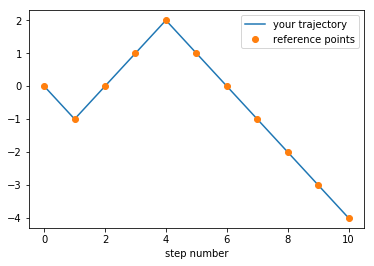

In [23]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

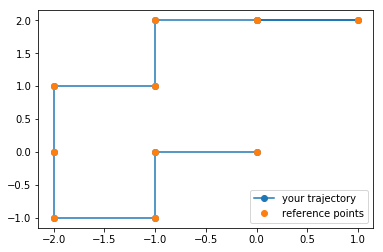

In [24]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

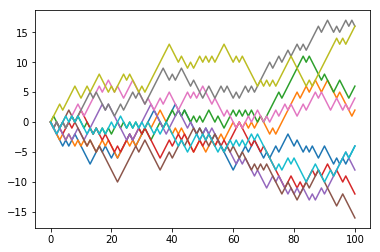

In [25]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


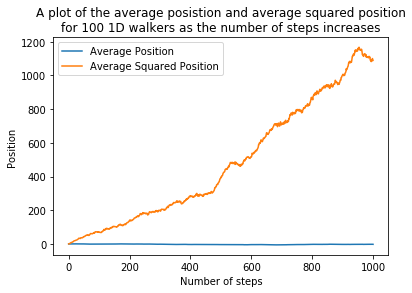

In [26]:

nsteps = 1000
ndim = 1
nwalkers = 100

# q gives a matrix where the columns are the walker positions
average = []
square = []
for i in range(nwalkers):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    if i == 0:
        q = ys
    else:
        q = numpy.hstack([q, ys])

for k in range (0, nsteps+1): #average distance
    z = numpy.average(q[k])
    average.append(z)
for j in range (0, nsteps+1): #average square distance
    p = numpy.square(q[j])
    r = numpy.average(p)
    square.append(r)


#print(average)
plt.xlabel('Number of steps')
plt.ylabel('Position')
plt.title('A plot of the average posistion and average squared position\nfor 100 1D walkers as the number of steps increases')
plt.plot(range(nsteps+1), average)
plt.plot(range(nsteps+1), square)
plt.gca().legend(('Average Position', 'Average Squared Position'))
plt.show()

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


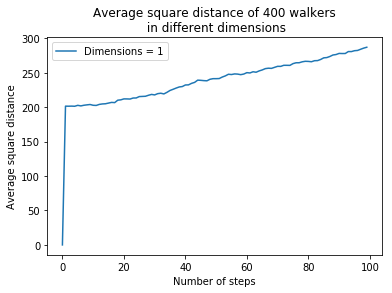

In [30]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)
numpy.random.seed(1000)
numstep = []
for i in range (nsteps):
    numstep.append(i)

for k in range(1, 2):
    avsq = []
    for a in range(0, nwalkers):
        disSq = numpy.zeros(1)
        w = walker(numpy.array([10, 10]), ndim = (k+1))
        pos2 = numpy.square(w.doSteps(nsteps))
        for i in range (1, nsteps):
            disSq = numpy.hstack([disSq, numpy.sum(pos2[i, :])])
        if a == 0:
            total = disSq
        else:
            total = numpy.vstack([total, disSq])
    for i in range(0, nsteps):
        avsq.append(numpy.average(total[:, i]))
    plt.plot(numstep, avsq)

#Graph
plt.xlabel('Number of steps')
plt.ylabel('Average square distance')
plt.title('Average square distance of 400 walkers\n in different dimensions')
plt.gca().legend(('Dimensions = 1','Dimensions = 2', 'Dimensions = 3', 'Dimensions = 4'))
plt.show()

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


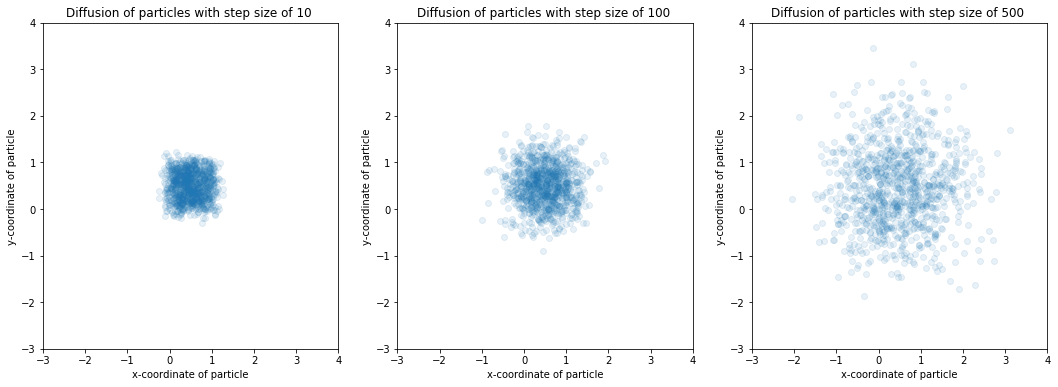

In [8]:
#use the starting x's and y's for each walker as the basis of the walker function
numpy.random.seed(1114)
ndim=2
nwalkers= 1000

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))

# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]):
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.xlabel('x-coordinate of particle')
    plt.ylabel('y-coordinate of particle')
    plt.title("Diffusion of particles with step size of {} ".format(nsteps))
    x = []
    y = []
    for i in range(nwalkers):
        w = walker(rand_pos[i], ndim = 2, step_size = 0.05)
        points = w.doSteps(nsteps)
        x.append(points[nsteps][0])
        y.append(points[nsteps][1])
    
    plt.scatter(x, y, alpha=0.1)